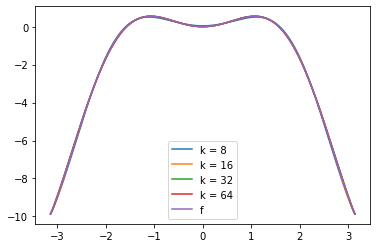

In [19]:
import numpy as np
from fft import fft_iterative as FFT
import matplotlib.pyplot as plt
from scipy.fft import fftshift
from trig_inter import trig_inter


f = lambda x : x**2 * np.cos(x)
axis = np.linspace(-np.pi, np.pi, 1000, endpoint=True)
interpolants = np.column_stack((axis, f(axis)))


fig, ax = plt.subplots()

errors = [axis]
geom_error = []

for k in [8,16,32,64]:
    x = np.linspace(-np.pi, np.pi, k, endpoint=True)

    # X = FFT(f(x))
    #interpolant = X[0]
    #for i in range(1,len(X)//2+1):
    #    interpolant += 2 * np.abs(X[i]) * np.cos(i * axis + np.angle(X[i]))
    #interpolant = 1 / k * interpolant.real

    interpolant = trig_inter(f(x), axis, dt=x[1]-x[0], phase=np.pi)
    ax.plot(axis, interpolant, label=f'k = {k}')

    error = np.abs(f(axis) - interpolant)
    gerror = np.linalg.norm(f(axis) - interpolant)
    errors.append(error)
    geom_error.append(gerror)
    interpolants = np.column_stack((interpolants, interpolant))


np.savetxt('errors.csv', np.transpose(errors), header='x,8,16,32,64', comments='', delimiter=',')
np.savetxt('geometric_errors.csv', np.column_stack(([8,16,32,64],geom_error)), header='k,e', comments='', delimiter=',')
np.savetxt('interpolants.csv', interpolants, header='x,f,8,16,32,64', comments='', delimiter=',')

plt.plot(axis, f(axis), label='f')
plt.legend()
plt.show()
